In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
holdout=pd.read_csv('test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [5]:
def process_data(data):
    data=process_missing(data)
    data=process_age(data)
    data=process_fare(data)
    data=process_titles(data)
    data=process_cabin(data)
    data=create_dummies(data,['Age_categories','Fare_categories','Title','Cabin_type','Sex'])
    return data
train=process_data(train)
holdout=process_data(holdout)

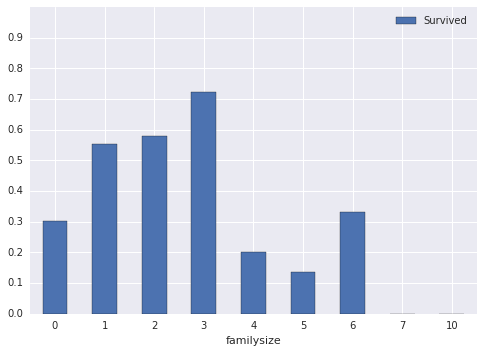

In [6]:
explore_cols = ["SibSp","Parch","Survived"]
explore = train[explore_cols].copy()

explore['familysize'] = explore[["SibSp","Parch"]].sum(axis=1)
pivot = explore.pivot_table(index='familysize',values="Survived")
pivot.plot.bar(ylim=(0,1),yticks=np.arange(0,1,.1),rot=0)
plt.show()

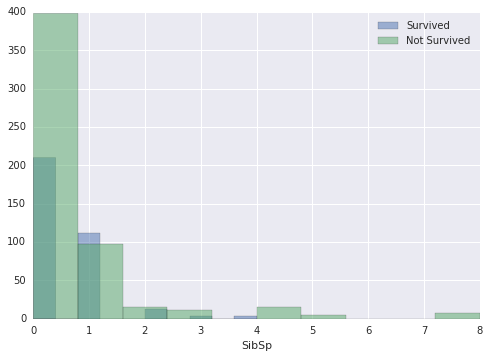

In [7]:
explore['SibSp'][explore['Survived']==1].hist(alpha=0.5,label='Survived')
explore['SibSp'][explore['Survived']==0].hist(alpha=0.5,label='Not Survived')
plt.legend()
plt.xlabel('SibSp')

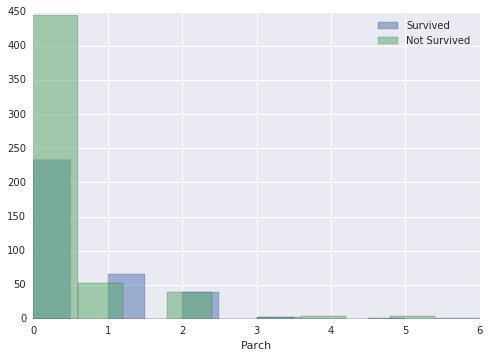

In [8]:
explore['Parch'][explore['Survived']==1].hist(alpha=0.5,label='Survived')
explore['Parch'][explore['Survived']==0].hist(alpha=0.5,label='Not Survived')
plt.legend()
plt.xlabel('Parch')

In [9]:
def process_company(data):
    data['familysize']=data[["SibSp","Parch"]].sum(axis=1)
    data['isalone']=0
    data.loc[data['familysize']==0,'isalone']=1
    data.drop('familysize',axis=1,inplace=True)
    return data

In [10]:
train=process_company(train)
holdout=process_company(holdout)

In [11]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [32]:
def select_features(data):
    data=data.select_dtypes(np.number).dropna(axis=1)
    all_X=data.drop(['PassengerId','Survived'],axis=1)
    all_y=data['Survived']
    rf=RandomForestClassifier(random_state=1)
    fs=RFECV(rf,cv=10)
    fs.fit(all_X,all_y)
    best_features=fs.support_
    best_features=all_X.columns[best_features]
    return best_features

In [33]:
best_features=select_features(train)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/__init__.py:54: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [47]:
def select_model(data,features):
    all_X=data[features]
    all_y=data['Survived']
    dictionaries=[{"name": "KNeighborsClassifier",
                   "estimator": KNeighborsClassifier(),
                   "hyperparameters":
                        {
                            "n_neighbors": range(1,20,2),
                            "weights": ["distance", "uniform"],
                            "algorithm": ["ball_tree", "kd_tree", "brute"],
                            "p": [1,2]
                        }
                    },
                    {"name": "LogisticRegression",
                     "estimator": LogisticRegression(),
                     "hyperparameters":
                        {
                             "solver": ["newton-cg", "lbfgs", "liblinear"],
            
                        }
                    },
                    {"name": "RandomForestClassifier",
                     "estimator": RandomForestClassifier(random_state=1),
                     "hyperparameters":
                        {
                            "n_estimators": [4, 6, 9],
                            "criterion": ["entropy", "gini"],
                            "max_depth": [2, 5, 10],
                            "max_features": ["log2", "sqrt"],
                            "min_samples_leaf": [1, 5, 8],
                            "min_samples_split": [2, 3, 5]
            
                        }
                    }]
    for d in dictionaries:
        print(d['name'])
        print('-'*len(d['name']))
        grid=GridSearchCV(d['estimator'],cv=10,param_grid=d['hyperparameters'])
        grid.fit(all_X,all_y)
        d['best_parameter']=grid.best_params_
        d['best_score']=grid.best_score_
        d['best_model']=grid.best_estimator_
        print('Best Parameters: {}'.format(d['best_parameter']))
        print('Best Score: {}'.format(d['best_score']))
    
    return dictionaries

In [48]:
best_models=select_model(train,best_features)

KNeighborsClassifier
--------------------
Best Parameters: {'p': 1, 'n_neighbors': 5, 'algorithm': 'brute', 'weights': 'uniform'}
Best Score: 0.7755331088664422
LogisticRegression
------------------
Best Parameters: {'solver': 'liblinear'}
Best Score: 0.8204264870931538
RandomForestClassifier
----------------------
Best Parameters: {'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 4, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}
Best Score: 0.8294051627384961


In [54]:
def save_submission_file(model,features,filename):
    predictions=model.predict(holdout[features])
    submission=pd.DataFrame({'Survived': predictions,
                             'PassengerId':holdout['PassengerId']})
    submission.to_csv(filename,index=False)

In [55]:
best_model=best_models[2]['best_model']
save_submission_file(best_model,best_features,'submission.csv')